In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
from math import atan,sin,cos
from scipy.spatial import ConvexHull


Define map and obstacle in map as convex hull

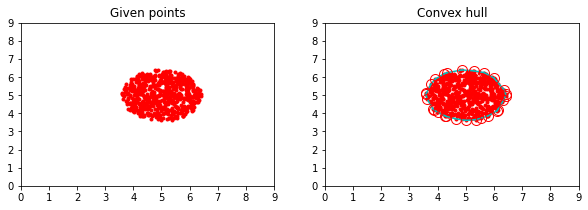

In [2]:
map_size=10
x=[]
y=[]
for i in range(10000):
        x.append(np.random.rand()*map_size)
        y.append(np.random.rand()*map_size)
# points = np.random.randint(0, 10, size=(100, 2))  # Random points in 2-D
obstacle=[[5,5]]
obstacle_points=[]
obstacle_radius=2
for i in range(len(x)):
#     plt.plot([x[i]], [y[i]], marker='o', markersize=1, color="blue")

    for j in (obstacle):
        
        [xa,ya]=j
        if (x[i]-xa)**2+(y[i]-ya)**2<=obstacle_radius:
#             occupancy[i]=1
            obstacle_points.append([x[i],y[i]])
points=np.array(obstacle_points)
hull = ConvexHull(points)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 3))

for ax in (ax1, ax2):
    ax.plot(points[:, 0], points[:, 1], '.', color='red')
    if ax == ax1:
        ax.set_title('Given points')
    else:
        ax.set_title('Convex hull')
        for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], 'c')
        ax.plot(points[hull.vertices, 0], points[hull.vertices, 1], 'o', mec='r', color='none', lw=1, markersize=10)
    ax.set_xticks(range(10))
    ax.set_yticks(range(10))
plt.show()

Generate a trajectory 

[[[4.3080137913428995, 3.8262108584349153], 1.7104076140491435], [[4.247600515487879, 3.8711973579424197], 1.7156082307381184], [[4.357959214945247, 3.836574284372505], 1.7472741233074287], [[4.226859148657379, 3.9445818042406886], 1.7682689980705164], [[4.007681071465662, 4.053816972520519], 1.7717551927850652], [[4.384027082209658, 3.8506590736396786], 1.7738451973499918], [[4.226630505275182, 3.9602093651250403], 1.7817557518199294], [[4.18200605991228, 4.001072710579535], 1.7964287772552046], [[4.396056423070764, 3.8926686392408802], 1.8150733754128496], [[4.273026481346066, 3.978245311595411], 1.8205124722484658], [[4.638811770243253, 3.699497170100423], 1.823134308359807], [[4.249623158715583, 4.000847822786299], 1.8284477024559456], [[4.239563332773306, 4.011236389510959], 1.8326144436581313], [[4.306669506714101, 3.9761210079858698], 1.8359422372092409], [[3.876555225373628, 4.178686930128148], 1.8469187548635442], [[3.9753665001218987, 4.148037002318575], 1.8484763602492236], 

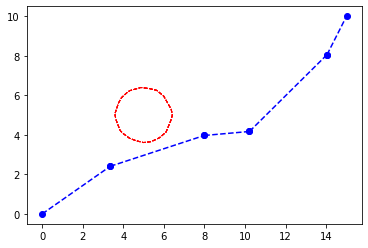

In [4]:

start=[0,0]
target=[15,10]
def get_nearest_obstacle(Pi,obstacle_points):
    distances=[]
    for point in obstacle_points:
        distances.append([point,distance(Pi,point)])
    distances.sort(key=lambda x:x[1])
    print(distances)
    return distances[0][0]

def distance(pointA,pointB):
    return np.sqrt((pointA[0]-pointB[0])**2+(pointA[1]-pointB[1])**2)
def get_next_target(pointA,pointB,hull,obstacle_points):
    x=cp.Variable((1,2))
    objective=cp.Minimize(cp.norm(pointB-X,2)-cp.norm(pointA-X,2))
    constraints=[X>0]
    for i in obstacle_points:
        constraints.append(cp.norm(i,X)>=2)
    prob=cp.Problem(objective,constraints)
    prob.solve()
    print(X.value)
    return X.value
    
def get_nearest_five(pointA,pointB,hull,obstacle_points):
    
    yaw=atan((pointB[1]-pointA[1])/(pointB[0]-pointA[0]))
    waypoint=[]
    points=np.array(obstacle_points)
    plt.plot(points[hull.vertices, 0], points[hull.vertices, 1], 'r--', lw=1, markersize=10)
    threshold=5
    coordinates=[]
    dist=distance(pointA,pointB)
    if dist>threshold:
        
        r=threshold
        x_point=pointA[0]+(np.random.rand()*r)
        y_point=pointA[1]+(np.random.rand()*r)
    else:
        r=dist
        x_point=pointB[0]
        y_point=pointB[1]
#     for i in range(5):
    while(distance([x_point,y_point],get_nearest_obstacle([x_point,y_point],obstacle_points)))<1:
        x_point=pointA[0]+(np.random.rand()*r)
        y_point=pointA[1]+(np.random.rand()*r)
    print([x_point,y_point])
    obstacle_point=[]
    if x_point>0 and y_point>0:
        obstacle_point+=obstacle_points
        obstacle_point.append([x_point,y_point])
        point=np.array(obstacle_point)
        hull_new=ConvexHull(point)
#         print(len(hull),len(hull_new))
        if hull!=hull_new:
            #no collision
            waypoint.append([x_point,y_point])
            print("no collision---->",x_point,y_point)
        else:
            print("collision---->",x_point,y_point)
            plt.plot([x_point], [y_point], '.', color='k')
    waypoint=np.array(waypoint)
    return waypoint
trajectory=[]
while distance(start,target)>1:
    trajectory.append(start)
    int_points=get_nearest_five(start,target,hull,obstacle_points)   

    max_dist=0
    
    for i in int_points:
#         plt.plot(i[:, 0], i[:, 1], 'o', color='green')
        print(i)
        if distance(start,i)>max_dist:
            x_max,y_max=i
            max_points=[x_max,y_max]
    # x1 = [1, 5]
    # y1 = [4, 1]
    print(start,max_points)
    # plt.plot([x_max], [y_max], '.', color='blue')
    x_values = [start[0], max_points[0]]
    y_values = [start[1], max_points[1]]
    plt.plot(x_values, y_values, 'bo', linestyle="--")
    start=max_points
trajectory.append(target)    


In [11]:
# def distance(pointA,pointB):
#     return np.sqrt((pointA[0]-pointB[0])**2+(pointA[1]-pointB[1])**2)
# def get_next_target(pointA,pointB,hull,obstacle_points):
#     pointA=np.array(pointA).reshape(1,2)
#     pointB=np.array(pointB).reshape(1,2)
#     X=cp.Variable((1,2))
#     objective=cp.Minimize(cp.norm(pointB-X,2)-cp.norm(pointA-X,2))
#     constraints=[X>=0]
#     for i in obstacle_points:
#         obs=np.array(i).reshape(1,2)
#         constraints.append(cp.norm(obs-X,2)>=2)
#     prob=cp.Problem(objective,constraints)
#     prob.solve(qcp=True)
#     print(X.value)
#     return X.value
# for i in range(10000):
#         x.append(np.random.rand()*map_size)
#         y.append(np.random.rand()*map_size)
# # points = np.random.randint(0, 10, size=(100, 2))  # Random points in 2-D
# obstacle=[[5,5]]
# obstacle_points=[]
# obstacle_radius=2
# for i in range(len(x)):
# #     plt.plot([x[i]], [y[i]], marker='o', markersize=1, color="blue")

#     for j in (obstacle):
        
#         [xa,ya]=j
#         if (x[i]-xa)**2+(y[i]-ya)**2<=obstacle_radius:
# #             occupancy[i]=1
#             obstacle_points.append([x[i],y[i]])
# points=np.array(obstacle_points)
# hull = ConvexHull(points)
# trajectory=[]
# while distance(start,target)>1:
#     trajectory.append(start)
#     int_point=get_next_target(start,target,hull,obstacle_points)
#     x_values = [start[0], max_points[0]]
#     y_values = [start[1], max_points[1]]
#     plt.plot(x_values, y_values, 'bo', linestyle="--")
#     start=int_points
# trajectory.append(target)    

DQCPError: The problem is not DQCP.

In [17]:
print(trajectory)
print(len(trajectory))

[[ 0.          0.        ]
 [ 0.81813324  4.34243427]
 [ 1.7078782   6.16945278]
 [ 6.55617578  8.9911012 ]
 [ 8.53626569 11.1602325 ]
 [13.05281018 14.47239943]
 [15.         10.        ]]
7


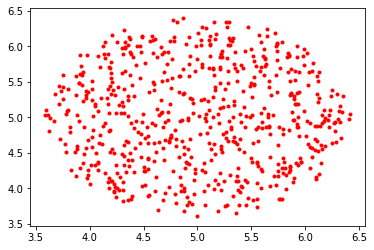

In [5]:
points=np.array(obstacle_points)
plt.plot(points[:, 0], points[:, 1], '.', color='red')
plt.show()

infeasible None 3.5 [0. 0.]
optimal [0.6650543 0.6650543] 2.75 [0. 0.]
infeasible None 3.125 [0. 0.]
return from function,  [array([0., 0.]), 3.125]
infeasible None 3.5 [3.35226649 2.40774644]
infeasible None 2.75 [3.35226649 2.40774644]
infeasible None 2.375 [3.35226649 2.40774644]
return from function,  [array([3.35226649, 2.40774644]), 2.375]
current bubble [array([0., 0.]), 3.125] next bubble [array([3.35226649, 2.40774644]), 2.375]
infeasible None 3.5 [3.35226649 2.40774644]
infeasible None 2.75 [3.35226649 2.40774644]
infeasible None 2.375 [3.35226649 2.40774644]
return from function,  [array([3.35226649, 2.40774644]), 2.375]
infeasible None 3.5 [7.99020806 3.96826268]
infeasible None 2.75 [7.99020806 3.96826268]
infeasible None 2.375 [7.99020806 3.96826268]
return from function,  [array([7.99020806, 3.96826268]), 2.375]
current bubble [array([3.35226649, 2.40774644]), 2.375] next bubble [array([7.99020806, 3.96826268]), 2.375]
infeasible None 3.5 [7.99020806 3.96826268]
infeasib

/tmp/ipykernel_21675/2531964061.py:118: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(x_values, y_values, 'b--', linestyle="--")


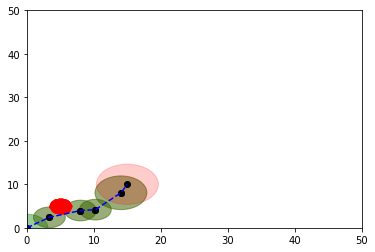

In [23]:
def get_nearest_obstacle(Pi,obstacle_points):
    distances=[]
    for point in obstacle_points:
        distances.append([point,distance(Pi,point)])
    distances.sort(key=lambda x:x[1])
#     print(distances)
    return distances[0]
def compute_balancing_force(Q_old,Q_new,F_old):
    F_new=Q_new-Q_old
    N_new=F_old-F_new
    return N_new
def generate_bubble(Pi):#bisection
    r_min=2
    r_max=5
#     max_iter=100
    r=0
    Ai=cp.Variable(2)
    center=[]
    while r_max-r_min>0.5:
        r=0.5*(r_min+r_max)
        objective=cp.Minimize(0)
        constraints=[Ai>=0]
        
        for obstacles in obstacle_points:
            constraints.append(cp.norm(Pi-obstacles,2)>=2*r)
        prob=cp.Problem(objective,constraints)
        prob.solve()
        
        print(prob.status,Ai.value,r,Pi)
        
        if prob.status=="optimal":
            
            center=Pi
            r_min=r
            if r<r_min:
                nearest_point,distance=get_nearest_obstacle(Pi,obstacle_points)
                theta=atan((Pi[1]-nearest_point[1])/(Pi[0]-nearest_point[0]))
#             center=Pi
                center=[Pi[0]+(r_min*cos(theta)),Pi[1]+(r_min*sin(theta))]
                break
        else:
            r_max=r
            
            
            
            center=Pi
            
            
    print("return from function, ",[center,r])
    return [center,r]
def compute_norm(x,order=None):
    return np.linalg.norm(x, ord=order)

trajectory=np.array(trajectory)
current_index=0
current_pose=trajectory[current_index]
radius=2
bubble_info=[]
target_pose=trajectory[-1]
ax = plt.gca()

ax.set_xlim((0, 50))
ax.set_ylim((0, 50))
# for i in O:
#     obs_plot=plt.Circle(i, 2, color='b', alpha=0.2)

#     ax.plot(i,2, 'o', color='m',alpha=0.4)
waypoints=[current_pose]
points=np.array(obstacle_points)

plt.plot(points[:, 0], points[:, 1], '.', color='red')

while compute_norm(current_pose-target_pose,2)>0.5*radius:
#     print(current_index)
    current_pose=trajectory[current_index]
#     waypoints.append(current_pose)
    next_target=trajectory[current_index+1]
    current_bubble=generate_bubble(current_pose)
    next_bubble=generate_bubble(next_target)
    bubble_info.append(current_bubble)
    print("current bubble",current_bubble,"next bubble",next_bubble)
    current_plot=plt.Circle(list(current_bubble[0]), current_bubble[1], color='g', alpha=0.4)
    next_plot=plt.Circle(list(next_bubble[0]), next_bubble[1], color='r', alpha=0.2)
    ax.add_patch(current_plot)
    ax.add_patch(next_plot)
    ax.plot((current_bubble[0][0]),(current_bubble[0][1]), 'o', color='k')
    ax.plot((next_bubble[0][0]),(next_bubble[0][1]) ,'o', color='k')
       
    
#     print(next_bubble[1]+current_bubble[1],compute_norm(current_pose-next_target,2))
    if next_bubble[1]+current_bubble[1]>compute_norm(current_pose-next_target,2) and next_target[1]>(1*radius*current_pose[1]):
        next_bubble=current_bubble
#         theta=compute_balancing_force(Q_old,Q_new,F_old)
#         waypoints.append(next_target)
    else:
        
        query_pose=current_pose
        query_bubble=current_bubble
#         while next_bubble[1]+query_bubble[1]<=compute_norm(query_pose-next_target,2):
#             query_pose=(query_pose+next_target)*0.5
#             query_bubble=generate_bubble(query_pose)
#             query_plot=plt.Circle(query_bubble[0], query_bubble[1], color='b', alpha=0.2)
# #             print("intermediate bubble",query_bubble)
#             waypoints.append(query_pose)
#             ax.add_patch(query_plot)

    waypoints.append(next_target)
    current_index+=1
    if current_index==len(trajectory)-1:
        break

print("Waypoints",waypoints)
x_values=[]
y_values=[]
for i in range(len(trajectory)):
    x_values.append(trajectory[i][0])
    y_values.append(trajectory[i][1])
plt.plot(x_values, y_values, 'b--', linestyle="--")
print(len(waypoints))




        

In [50]:
    n=len(waypoints)
    Q=cp.Variable((n,2))
    v=np.ones(n)
    print(bubble_info)
    alpha=np.ones(n)
    

[[array([0., 0.]), 3.125], [array([3.35226649, 2.40774644]), 2.375], [array([7.99020806, 3.96826268]), 2.375], [array([10.21694431,  4.17101054]), 2.375], [array([14.0383327 ,  8.05572724]), 3.875]]


In [53]:
Nk=0
d=1

for i in range(1,n-1):
    Nk+=cp.norm(2*Q[i]-Q[i-1]+Q[i+1])**2
objective=cp.Minimize(Nk)
constraints=[Q[0]==waypoints[0],Q[n-1]==waypoints[n-1]]

for i in range(1,n-1):
    if n%2!=0:
        constraints.append(Q[i]==waypoints[i]+(d*(v[i-1]/cp.norm(v[i-1]))))
    else:
        constraints.append(Q[i]==waypoints[i]-(d*(v[i-1]/cp.norm(v[i-1]))))
    
    constraints.append(cp.norm(Q[i]-bubble_info[i][0],2)<=bubble_info[i][1])
#     constraints.append(cp.norm(2*Q[i]-Q[i-1]+Q[i+1])<=min(d**2/2,alpha[i]*(d/v[i])**2))

In [54]:
prob=cp.Problem(objective,constraints)
prob.solve()

/home/athira/anaconda3/envs/work_env/lib/python3.9/site-packages/cvxpy/problems/problem.py:1296: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


2825.7106583844425

[[2.26275708e-10 1.11906984e-10]
 [2.35226649e+00 1.40774644e+00]
 [6.99020806e+00 2.96826268e+00]
 [9.21694431e+00 3.17101054e+00]
 [1.30383327e+01 7.05572724e+00]
 [1.50000000e+01 1.00000000e+01]]


/tmp/ipykernel_21675/282618451.py:10: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(x_values, y_values, 'b--', linestyle="--",label='Input trajectory')
/tmp/ipykernel_21675/282618451.py:17: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "g--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(x_values, y_values, 'g--', linestyle="--",label="Final trajectory")


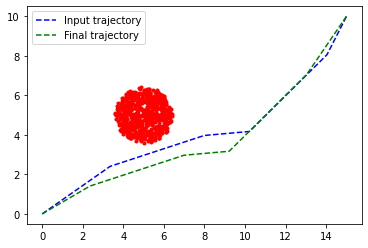

In [57]:
print(Q.value)
points=np.array(obstacle_points)

plt.plot(points[:, 0], points[:, 1], '.', color='red')
x_values=[]
y_values=[]
for i in range(len(trajectory)):
    x_values.append(trajectory[i][0])
    y_values.append(trajectory[i][1])
plt.plot(x_values, y_values, 'b--', linestyle="--",label='Input trajectory')
x_values=[]
y_values=[]
for i in range(len(Q.value)):
    x_values.append(Q.value[i][0])
    y_values.append(Q.value[i][1])
    
plt.plot(x_values, y_values, 'g--', linestyle="--",label="Final trajectory")
plt.legend()

In [62]:

coordinates=trajectory
total_distance = 0
for ndx in range(1, len(coordinates)-1):
    pt1 = coordinates[ndx - 1]
    pt2 = coordinates[ndx]
    total_distance += np.linalg.norm(pt2-pt1,2)
print("Length of initial trajectory : ",total_distance)

coordinates=Q.value
total_distance = 0
for ndx in range(1, len(coordinates)-1):
    pt1 = coordinates[ndx - 1]
    pt2 = coordinates[ndx]
    total_distance += np.linalg.norm(pt2-pt1,2)
print("Length of processed trajectory : ", total_distance)



Length of initial trajectory :  16.7059460779677
Length of processed trajectory :  15.319939505357421
